<a href="https://colab.research.google.com/github/karan29-bot/Market-Basket-Analysis/blob/main/DMW_MICRO_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

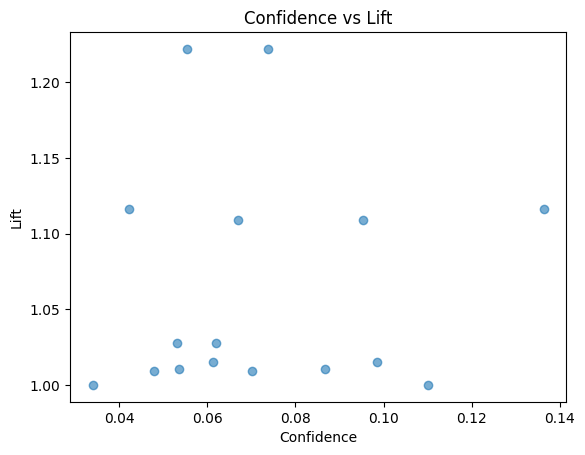

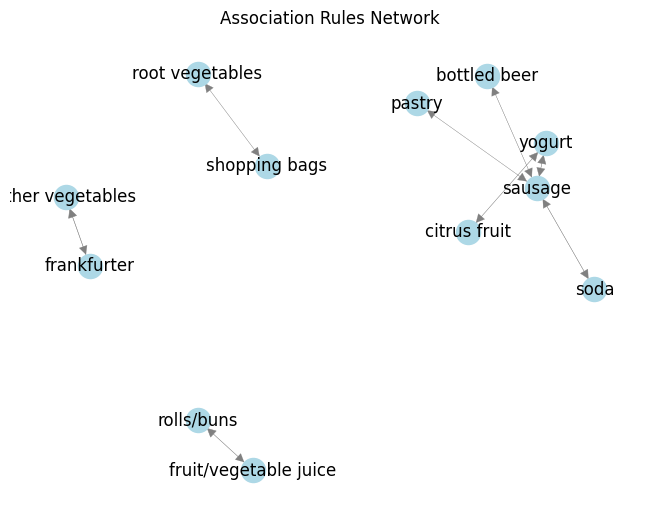

          antecedents           consequents  support  confidence     lift
         bottled beer               sausage 0.003342    0.073746 1.222000
              sausage          bottled beer 0.003342    0.055371 1.222000
          frankfurter      other vegetables 0.005146    0.136283 1.116150
     other vegetables           frankfurter 0.005146    0.042146 1.116150
              sausage                yogurt 0.005748    0.095238 1.108986
               yogurt               sausage 0.005748    0.066926 1.108986
              sausage                pastry 0.003208    0.053156 1.027617
               pastry               sausage 0.003208    0.062016 1.027617
                 soda               sausage 0.005948    0.061253 1.014975
              sausage                  soda 0.005948    0.098560 1.014975
               yogurt          citrus fruit 0.004611    0.053696 1.010642
         citrus fruit                yogurt 0.004611    0.086792 1.010642
      root vegetables         shopping

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# STEP 1: Load dataset
df = pd.read_csv('/content/Groceries_dataset.csv')

# STEP 2: Group rows into transactions (basket = list of items for each (Member_number, Date))
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

# STEP 3: One-hot encode the baskets
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
trans_df = pd.DataFrame(te_ary, columns=te.columns_)

# STEP 4: Find frequent itemsets using Apriori (min_support can be adjusted)
frequent_itemsets = apriori(trans_df, min_support=0.003, use_colnames=True)

# STEP 5: Generate association rules with support, confidence, lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# STEP 6: Format, sort, and display rules by lift (descending)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules = rules.sort_values(by='lift', ascending=False)

import matplotlib.pyplot as plt
import networkx as nx

# Scatter plot: Confidence vs Lift
plt.scatter(rules['confidence'], rules['lift'], alpha=0.6)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift')
plt.show()

# Network graph of rules
G = nx.DiGraph()
for _, r in rules.iterrows():
    G.add_edge(r['antecedents'], r['consequents'], weight=r['confidence'])

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', width=[d['weight']*3 for (_,_,d) in G.edges(data=True)],
        arrowsize=15)
plt.title('Association Rules Network')
plt.show()

from mlxtend.frequent_patterns import fpgrowth, association_rules



# STEP 7: Print final rules (support, confidence, lift)
print(rules.to_string(index=False))

# Each step is briefly commented; just run with 'Groceries_dataset.csv' in your directory.
